In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Valens\Documents\Python Anaconda\New York City Airbnb Open Data analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'AB_NYC_2019_CLEAN.pkl'))

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19 00:00:00.000000000,0.21,6,365
1,2595,Skylit Midtown Castle,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00.000000000,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,2018-10-04 01:47:23.910099456,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00.000000000,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00.000000000,0.10,1,0


In [6]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.755045,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.143242,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# This would be a substitute to see when was the earliest listing.
df['last_review'].min()

Timestamp('2011-03-28 00:00:00')

In [8]:
# Creating a mean of the data by yearly basis
df['last_review'] = pd.to_datetime(df['last_review'])
df.set_index("last_review").groupby(pd.Grouper(freq="Y"))["price"].mean()

last_review
2011-12-31    169.000000
2012-12-31    158.120000
2013-12-31    256.208333
2014-12-31    160.326633
2015-12-31    157.204594
2016-12-31    151.787957
2017-12-31    135.462315
2018-12-31    172.676510
2019-12-31    141.820344
Freq: A-DEC, Name: price, dtype: float64

In [9]:
# Creating a new subset between last review and the price
df_new = df.set_index("last_review").groupby(pd.Grouper(freq="Y"))["price"].mean()

In [10]:
df_new2 = df_new.reset_index()

In [32]:
df_new2.head(10)

,price
last_review,
2011-12-31,169.000000
2012-12-31,158.120000
2013-12-31,256.208333
2014-12-31,160.326633
2015-12-31,157.204594
2016-12-31,151.787957
2017-12-31,135.462315
2018-12-31,172.676510
2019-12-31,141.820344


In [11]:
df_new.head(10)

last_review
2011-12-31    169.000000
2012-12-31    158.120000
2013-12-31    256.208333
2014-12-31    160.326633
2015-12-31    157.204594
2016-12-31    151.787957
2017-12-31    135.462315
2018-12-31    172.676510
2019-12-31    141.820344
Freq: A-DEC, Name: price, dtype: float64

In [12]:
df_new

last_review
2011-12-31    169.000000
2012-12-31    158.120000
2013-12-31    256.208333
2014-12-31    160.326633
2015-12-31    157.204594
2016-12-31    151.787957
2017-12-31    135.462315
2018-12-31    172.676510
2019-12-31    141.820344
Freq: A-DEC, Name: price, dtype: float64

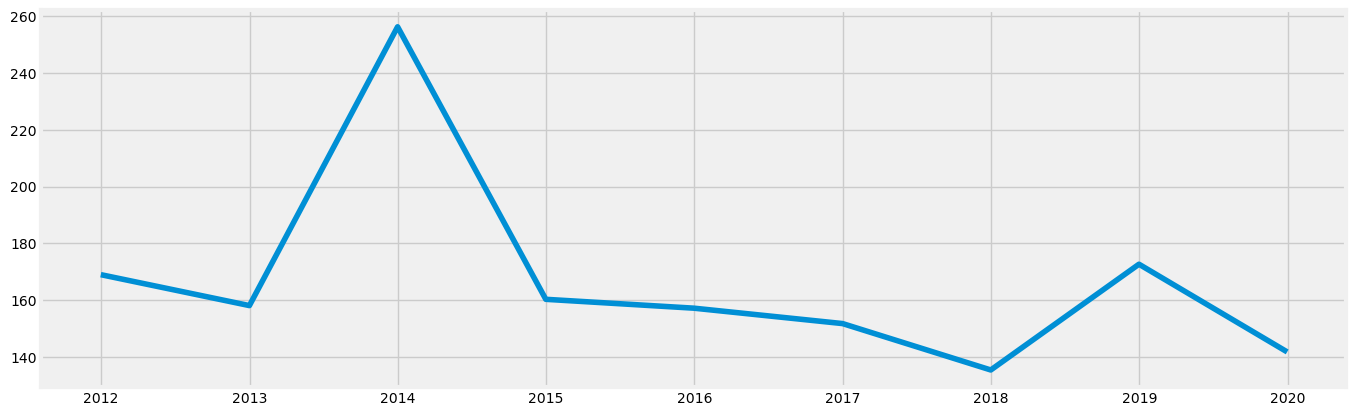

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_new)

### From the graph above it looks like there is a spike in price in 2014. Which could be a worth to expand our investigation on why is this the case. One of the theory could be that during this period there may be more people listing a tier 1 trend in an expensive location

In [21]:
df_new2.set_index('last_review', inplace = True)

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new2['price'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.635539
p-value                        0.085872
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


### From the result above we cam see that Test Statistic is bigger than the critical value, which mean that we can't reject the null hypothesis. This also further prove that the diagram is non stationary

In [23]:
df_new2.head()

,price
last_review,
2011-12-31,169.000000
2012-12-31,158.120000
2013-12-31,256.208333
2014-12-31,160.326633
2015-12-31,157.204594


In [24]:
data_diff = df_new2 - df_new2.shift(1)

In [25]:
data_diff

,price
last_review,
2011-12-31,NaN
2012-12-31,-10.880000
2013-12-31,98.088333
2014-12-31,-95.881700
2015-12-31,-3.122039
2016-12-31,-5.416637
2017-12-31,-16.325642
2018-12-31,37.214195
2019-12-31,-30.856166


In [26]:
data_diff.columns

Index(['price'], dtype='object')

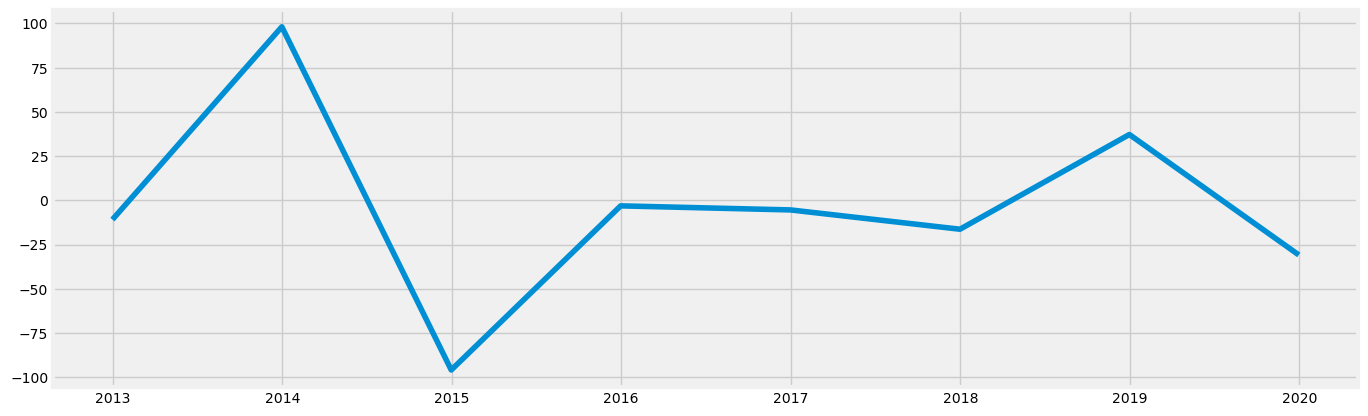

In [28]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_diff)

In [29]:
data_diff.dropna(inplace = True)

In [30]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['price'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.172830
p-value                        0.000732
Number of Lags Used            0.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


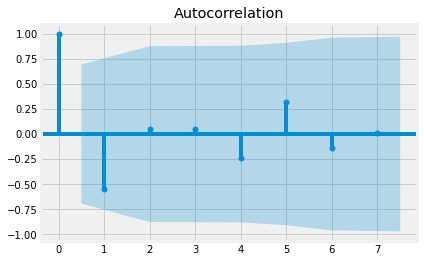

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

## From the above we can see that most of the vertical lines are within the blue area. Which this show that my data is stationary.